In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import csv

In [2]:
pd.set_option('float_format', '{0:.2f}'.format)

In [3]:
zillow_df = pd.read_csv("OutputData - Total.csv")
zipcode_df = pd.read_csv("Files/manhattan_mod.csv")

In [4]:
zillow_df.columns

Index(['Unnamed: 0', 'address', 'rent', 'sold', 'sold year', 'sqft', 'var',
       'zipcode'],
      dtype='object')

In [5]:
zipcode_df.columns

Index(['Neighborhood', 'zipcode'], dtype='object')

In [6]:
zillow_df = zillow_df.drop(columns='Unnamed: 0', axis=1) # axis 0 for row and axis 1 for column
zillow_df.head()

,address,rent,sold,sold year,sqft,var,zipcode
0,189 E 7th St,nan,3300000.00,2015.00,4200.00,1,10009
1,189 E 7th St,14995.00,4844809.00,2018.00,2183.00,0,10009
2,189 E 7th St,14995.00,nan,nan,nan,2,10009
3,526 E 5th St,23000.00,6100000.00,2018.00,5200.00,0,10009
4,133 Avenue D APT 16,3995.00,nan,nan,nan,2,10009


In [7]:
zillow_df = pd.merge(zillow_df, zipcode_df, on="zipcode", how="outer")

In [8]:
zillow_df.count()

address         23736
rent            23588
sold            13408
sold year       13408
sqft            13408
var             23736
zipcode         23737
Neighborhood    23604
dtype: int64

In [9]:
rent_df = zillow_df.groupby("Neighborhood", as_index=False).median()
rent_df.columns

Index(['Neighborhood', 'rent', 'sold', 'sold year', 'sqft', 'var', 'zipcode'], dtype='object')

In [10]:
rent_df = rent_df.drop(columns=["sold","sold year","var", "sqft", "zipcode"], axis=1)

In [11]:
rent_df

,Neighborhood,rent
0,Central Harlem,3100.00
1,Chelsea/Clinton,4550.00
2,East Harlem,3125.00
3,Gramercy/Murray,3500.00
4,Greenwich/Soho,6900.00
5,Inwood/Washington Heights,2350.00
6,Lower Eastside,3950.00
7,Lower Manhattan,4700.00
8,Upper Eastside,3750.00
9,Upper Westside,3850.00


In [12]:
zillow_df = zillow_df[zillow_df.loc[:,"sold year"] < 2016]

In [13]:
zillow_df

,address,rent,sold,sold year,sqft,var,zipcode,Neighborhood
0,189 E 7th St,nan,3300000.00,2015.00,4200.00,1.00,10009,Lower Eastside
27,187 E 7th St,1600.00,425000.00,2008.00,2310.00,0.00,10009,Lower Eastside
45,106 Roff Ave # B,2650.00,545000.00,2013.00,1938.00,0.00,10009,Lower Eastside
47,106 E Brinkerhoff Ave # B,2800.00,525000.00,2007.00,1884.00,0.00,10009,Lower Eastside
87,634 E 14th St APT 12,2600.00,385000.00,2007.00,500.00,0.00,10009,Lower Eastside
108,383-389 E 10th St # B1,4295.00,960000.00,2006.00,880.00,0.00,10009,Lower Eastside
110,383-389 E 10th St # D1,4400.00,170000.00,2000.00,940.00,0.00,10009,Lower Eastside
111,383-389 E 10th St # E1,4600.00,900000.00,2011.00,966.00,0.00,10009,Lower Eastside
113,383-389 E 10th St # B2,4000.00,146000.00,2000.00,820.00,0.00,10009,Lower Eastside
115,383-389 E 10th St # D2,4000.00,146000.00,2000.00,823.00,0.00,10009,Lower Eastside


In [14]:
zillow_df = zillow_df.dropna(how="any")

In [15]:
zillow_df.count()

address         8416
rent            8416
sold            8416
sold year       8416
sqft            8416
var             8416
zipcode         8416
Neighborhood    8416
dtype: int64

In [16]:
zillow_df = zillow_df.groupby("Neighborhood", as_index=False).median()

In [17]:
sold_df = zillow_df[["Neighborhood","sold", "sqft"]]

In [18]:
sold_df["Avg 20% Downpayment"] = sold_df["sold"]*.2

sold_df["Avg High Closing Cost"] = sold_df["sold"]*.05
sold_df["Avg Property Taxes"] = sold_df["sold"]*.008
avg_property_insurance = 1595

year1 = 15 *12
year2 = 30 *12
interestRate1 = 3.95/100/12
interestRate2 = 4.5/100/12

sold_df["15 Years Monthly Mortgage"] = (sold_df["sold"] * .8) * (interestRate1 * (1 +interestRate1) 
                                                                 ** year1) / ((1+interestRate1) ** year1 - 1)
sold_df["30 Years Monthly Mortgage"] = (sold_df["sold"] * .8) * (interestRate2 * (1 +interestRate2) 
                                                                 ** year2) / ((1+interestRate2) ** year2 - 1)
#Variable is the maintenance cost



C:\Users\yuj\anaconda\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\yuj\anaconda\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yuj\anaconda\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [19]:
clean_df = pd.merge(sold_df, rent_df, on="Neighborhood", how="outer")

In [20]:
clean_df

,Neighborhood,sold,sqft,Avg 20% Downpayment,Avg High Closing Cost,Avg Property Taxes,15 Years Monthly Mortgage,30 Years Monthly Mortgage,rent
0,Central Harlem,599000.00,1000.00,119800.00,29950.00,4792.00,3532.59,2428.04,3100.00
1,Chelsea/Clinton,1064581.00,1036.00,212916.20,53229.05,8516.65,6278.34,4315.26,4550.00
2,East Harlem,481650.00,816.00,96330.00,24082.50,3853.20,2840.52,1952.36,3125.00
3,Gramercy/Murray,757455.00,842.00,151491.00,37872.75,6059.64,4467.07,3070.33,3500.00
4,Greenwich/Soho,1400000.00,1319.00,280000.00,70000.00,11200.00,8256.47,5674.88,6900.00
5,Inwood/Washington Heights,310000.00,785.00,62000.00,15500.00,2480.00,1828.22,1256.58,2350.00
6,Lower Eastside,780000.00,866.50,156000.00,39000.00,6240.00,4600.03,3161.72,3950.00
7,Lower Manhattan,901468.00,1056.00,180293.60,45073.40,7211.74,5316.39,3654.08,4700.00
8,Upper Eastside,900000.00,1059.00,180000.00,45000.00,7200.00,5307.73,3648.13,3750.00
9,Upper Westside,795000.00,978.00,159000.00,39750.00,6360.00,4688.50,3222.52,3850.00


In [21]:
clean_df["Annual Cap Rate"] = ((clean_df["rent"]*12-clean_df["Avg Property Taxes"])/
                               (clean_df["sold"]+clean_df["Avg High Closing Cost"]))*100
clean_df["Cash on Cash Return"] = (((clean_df["rent"]-clean_df["30 Years Monthly Mortgage"])*12)/
(clean_df["Avg 20% Downpayment"]+clean_df["Avg High Closing Cost"]))*100


In [22]:
clean_df

,Neighborhood,sold,sqft,Avg 20% Downpayment,Avg High Closing Cost,Avg Property Taxes,15 Years Monthly Mortgage,30 Years Monthly Mortgage,rent,Annual Cap Rate,Cash on Cash Return
0,Central Harlem,599000.00,1000.00,119800.00,29950.00,4792.00,3532.59,2428.04,3100.00,5.15,5.38
1,Chelsea/Clinton,1064581.00,1036.00,212916.20,53229.05,8516.65,6278.34,4315.26,4550.00,4.12,1.06
2,East Harlem,481650.00,816.00,96330.00,24082.50,3853.20,2840.52,1952.36,3125.00,6.65,11.69
3,Gramercy/Murray,757455.00,842.00,151491.00,37872.75,6059.64,4467.07,3070.33,3500.00,4.52,2.72
4,Greenwich/Soho,1400000.00,1319.00,280000.00,70000.00,11200.00,8256.47,5674.88,6900.00,4.87,4.20
5,Inwood/Washington Heights,310000.00,785.00,62000.00,15500.00,2480.00,1828.22,1256.58,2350.00,7.90,16.93
6,Lower Eastside,780000.00,866.50,156000.00,39000.00,6240.00,4600.03,3161.72,3950.00,5.03,4.85
7,Lower Manhattan,901468.00,1056.00,180293.60,45073.40,7211.74,5316.39,3654.08,4700.00,5.20,5.57
8,Upper Eastside,900000.00,1059.00,180000.00,45000.00,7200.00,5307.73,3648.13,3750.00,4.00,0.54
9,Upper Westside,795000.00,978.00,159000.00,39750.00,6360.00,4688.50,3222.52,3850.00,4.77,3.79


In [ ]:
clean_df

In [ ]:
clean_df

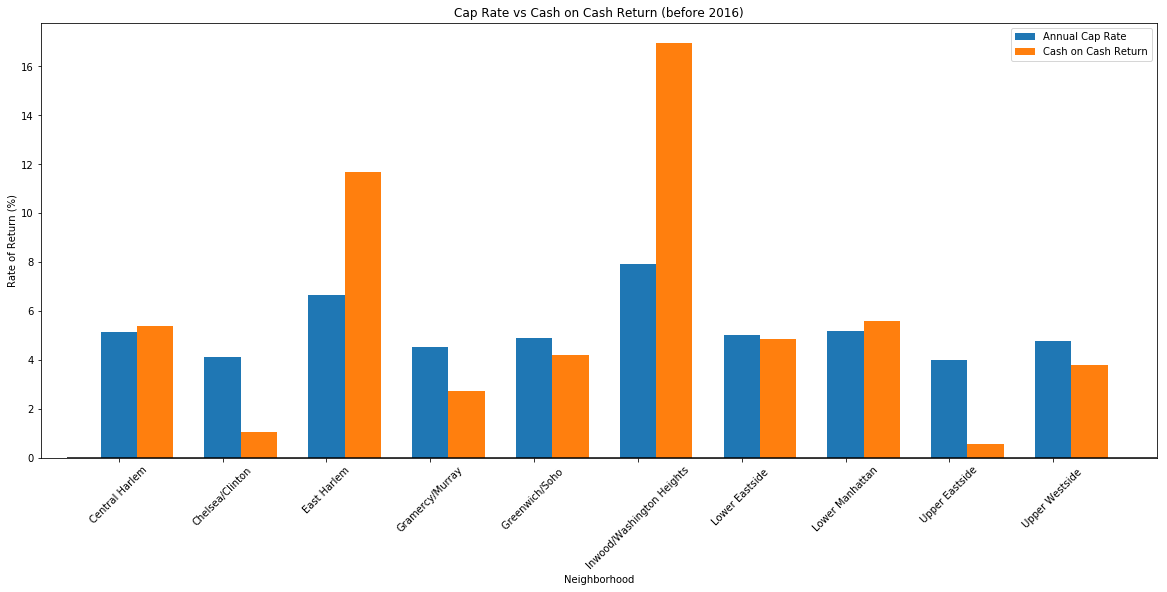

In [23]:
x_axis = np.arange(len(clean_df['Neighborhood']))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,8))

bar_width = 0.35

plt.bar(x_axis, clean_df['Annual Cap Rate'], bar_width, label="Annual Cap Rate")

plt.bar(x_axis+bar_width, clean_df['Cash on Cash Return'], bar_width, label="Cash on Cash Return")

plt.xticks(tick_locations, clean_df['Neighborhood'], rotation="45")
plt.xlim(-0.75, len(x_axis))

plt.hlines(y = 0, xmin = -0.5, xmax = 10)

plt.title("Cap Rate vs Cash on Cash Return (before 2016)")
plt.xlabel("Neighborhood")
plt.ylabel(f"Rate of Return (%)")

plt.legend()

plt.savefig('CapRate_CoCReturn_before_2016.png')
plt.show()

In [ ]:
clean_df.to_csv("RentvsMortgage.csv")

In [ ]:
x_axis = np.arange(len(clean_df['Neighborhood']))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,5))

bar_width = 0.25

plt.bar(x_axis, clean_df['rent'], bar_width, color="black", label="Rent")
plt.bar(x_axis+bar_width, clean_df['15 Years Monthly Mortgage'], bar_width, color="blue", label="15 Years Monthly Mortgage")
plt.bar(x_axis+bar_width, clean_df['Avg 20% Downpayment']/year1, bar_width, color="brown",
        bottom=clean_df['15 Years Monthly Mortgage'], label="Avg 20% Downpayment over 15 Years")
plt.bar(x_axis+bar_width, clean_df['Avg Property Taxes'], bar_width, color="green",
        bottom=clean_df['Avg 20% Downpayment']/year1+clean_df['15 Years Monthly Mortgage'], label="Avg Property Taxes")

plt.bar(x_axis+bar_width*2, clean_df['30 Years Monthly Mortgage'], bar_width, color="red", label="30 Years Monthly Mortgage")
plt.bar(x_axis+bar_width*2, clean_df['Avg 20% Downpayment']/year2, bar_width, color="brown",
        bottom=clean_df['30 Years Monthly Mortgage'], label="Avg 20% Downpayment over 30 Years")
plt.bar(x_axis+bar_width*2, clean_df['Avg Property Taxes'], bar_width, color="green",
        bottom=clean_df['Avg 20% Downpayment']/year2+clean_df['30 Years Monthly Mortgage'])

plt.xticks(tick_locations, clean_df['Neighborhood'], rotation="vertical")
plt.xlim(-0.75, len(x_axis))

plt.title("Rent vs Purchase")
plt.xlabel("Neighborhood")
plt.ylabel(f"Average Monthly cost ($)")

plt.legend()

plt.show()

In [ ]:
clean_df.columns